<a href="https://colab.research.google.com/github/SijieQiu/RQ/blob/main/127.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Converted into json file**

In [2]:
from google.colab import files

uploaded = files.upload()

Saving 127.docx to 127.docx


In [3]:
import json
!pip install python-docx
from docx import Document

file_name = '127.docx'

doc = Document(file_name)

data = []

for para in doc.paragraphs:
    if para.text.strip():
        parts = para.text.split('\t')
        if len(parts) >= 2:
            content = parts[0].strip()
            labels = [label.strip() for label in parts[1].split(',')]
            data.append({
                "content": content,
                "labels": labels
            })
print(f"Number of documents: {len(data)}")
print(f"Sample document: {data[0]}")

json_file_name = '127.json'
with open(json_file_name, 'w', encoding='utf-8') as json_file:
    json.dump(data, json_file, ensure_ascii=False, indent=4)

print(f"JSON file '{json_file_name}' created successfully!")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 4.9 MB/s eta 0:00:00
Number of documents: 27
Sample document: {'content': 'Joe Potter and Matthew Trent work at a small, remote outpost in the middle of a snowy wilderness. Joe wakes up on Christmas Day to find Matt preparing Christmas dinner, with "I Wish It Could Be Christmas Everyday" playing on the radio. Matt tries to get Joe to talk about why he accepted the job at the outpost, a topic they have never discussed in the five years they have worked together. Joe is reluctant to say anything and instead asks why Matt took the job. Happy with the conversation, Matt begins his story. The story is set in a world where people can access the Internet through an augmented reality device implanted in their eyes called the "Z-Eye". Matt was once a dating coach who taught seduction techniques to single men who struggle to attract women. He directs one of his clients, the shy and socially awkward Harry, into gatecrashing an office Ch

**BERtopic**

In [ ]:
import json
from sklearn.feature_extraction.text import CountVectorizer

# 读取JSON文件
file_name = '127.json'

with open(file_name, 'r') as input_file:
    data = json.load(input_file)

# 提取文档和标签
docs = [item['content'] for item in data]
labels = [item['labels'] for item in data]

# 打印文档和标签的数量，以及一个示例文档和它的标签
print(f"Number of documents: {len(docs)}")
print(f"Number of labels: {len(labels)}")
print(f"Sample document: {docs[0]}")
print(f"Sample label: {labels[0]}")

# 使用CountVectorizer将文本转换为向量
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(docs)

print(f"Feature shape: {X.shape}")

Number of documents: 27
Number of labels: 27
Sample document: Joe Potter and Matthew Trent work at a small, remote outpost in the middle of a snowy wilderness. Joe wakes up on Christmas Day to find Matt preparing Christmas dinner, with "I Wish It Could Be Christmas Everyday" playing on the radio. Matt tries to get Joe to talk about why he accepted the job at the outpost, a topic they have never discussed in the five years they have worked together. Joe is reluctant to say anything and instead asks why Matt took the job. Happy with the conversation, Matt begins his story. The story is set in a world where people can access the Internet through an augmented reality device implanted in their eyes called the "Z-Eye". Matt was once a dating coach who taught seduction techniques to single men who struggle to attract women. He directs one of his clients, the shy and socially awkward Harry, into gatecrashing an office Christmas party, and communicates with him through the Z-Eye. They are then 

In [ ]:
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB

In [ ]:
import json
from bertopic import BERTopic
from bertopic.backend import BaseEmbedder
from bertopic.cluster import BaseCluster
from bertopic.vectorizers import ClassTfidfTransformer
from bertopic.dimensionality import BaseDimensionalityReduction

# Load the JSON file
with open('127.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# Extract documents and labels
docs = [item['content'] for item in data]
y_labels = [item['labels'][0] for item in data]  # Assuming each doc has at least one label and taking the first label

# Create a mapping from labels to integers
label_mapping = {label: i for i, label in enumerate(set(y_labels))}

# Convert labels to integers
y = [label_mapping[label] for label in y_labels]

# Prepare our empty sub-models and reduce frequent words while we are at it.
empty_embedding_model = BaseEmbedder()
empty_dimensionality_model = BaseDimensionalityReduction()
empty_cluster_model = BaseCluster()
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

# Fit BERTopic without actually performing any clustering
topic_model = BERTopic(
    embedding_model=empty_embedding_model,
    umap_model=empty_dimensionality_model,
    hdbscan_model=empty_cluster_model,
    ctfidf_model=ctfidf_model
)
topics, probs = topic_model.fit_transform(docs, y=y) # Pass the integer labels to fit_transform


In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,0,3,0_rolo_carrie_nish_joe,"[rolo, carrie, nish, joe, clayton, dawson, mat...",[Captain Robert Daly (Jesse Plemons) and his c...
1,1,3,1_kelly_yorkie_stripe_junipero,"[kelly, yorkie, stripe, junipero, san, cooper,...","[Cooper (Wyatt Russell), a man living with his..."
2,2,2,2_callow_susannah_public_demand,"[callow, susannah, public, demand, broadcast, ...",[Kenny gets a call from his mother. His face i...
3,3,1,3_amy_frank_coach_lenny,"[amy, frank, coach, lenny, match, nicola, syst...",[The coach directs Frank to the hub. He walks ...
4,4,1,4_bo_mazey_hector_whitty,"[bo, mazey, hector, whitty, duke, pictures, cl...",[Bo sits in a motel parking lot listening to a...
5,5,1,5_david_cliff_lana_henry,"[david, cliff, lana, henry, station, jessica, ...",[As David Ross is drawing a portrait of his tw...
6,6,1,6_pia_davis_janet_stuart,"[pia, davis, janet, stuart, kenneth, iain, ric...",[Pia Koresh sleeps on Davis McCardle's shoulde...
7,7,1,7_joan_salma_krish_mac,"[joan, salma, krish, mac, tv, sandy, eric, hay...",[Joan Tait wakes up to her phone alarm. She tu...
8,8,1,8_ashley_rachel_catherine_too,"[ashley, rachel, catherine, too, jack, kevin, ...","[In a busy school cafeteria, Rachel Goggins si..."
9,9,1,9_chris_jaden_billy_smithereen,"[chris, jaden, billy, smithereen, penelope, me...","[In 2018, Chris (Andrew Scott) is a rideshare ..."


In [ ]:
# Map input `y` to topics
mappings = topic_model.topic_mapper_.get_mappings()

# Assuming 'data' should have a dictionary called 'target_names'
# If 'target_names' is actually a list, you'll need to adjust how you map the values
if "target_names" in data and isinstance(data["target_names"], dict):
    mappings = {value: data["target_names"][key] for key, value in mappings.items()}
else:
    print("Warning: 'data' does not contain a 'target_names' dictionary.")
    mappings = {value: key for key, value in mappings.items()}  # Use the original label if no mapping is available

# Assign original classes to our topics
df = topic_model.get_topic_info()
df["Class"] = df.Topic.map(mappings)
df

,Topic,Count,Name,Representation,Representative_Docs,Class
0,0,3,0_rolo_carrie_nish_joe,"[rolo, carrie, nish, joe, clayton, dawson, mat...",[Captain Robert Daly (Jesse Plemons) and his c...,11
1,1,3,1_kelly_yorkie_stripe_junipero,"[kelly, yorkie, stripe, junipero, san, cooper,...","[Cooper (Wyatt Russell), a man living with his...",3
2,2,2,2_callow_susannah_public_demand,"[callow, susannah, public, demand, broadcast, ...",[Kenny gets a call from his mother. His face i...,6
3,3,1,3_amy_frank_coach_lenny,"[amy, frank, coach, lenny, match, nicola, syst...",[The coach directs Frank to the hub. He walks ...,5
4,4,1,4_bo_mazey_hector_whitty,"[bo, mazey, hector, whitty, duke, pictures, cl...",[Bo sits in a motel parking lot listening to a...,10
5,5,1,5_david_cliff_lana_henry,"[david, cliff, lana, henry, station, jessica, ...",[As David Ross is drawing a portrait of his tw...,14
6,6,1,6_pia_davis_janet_stuart,"[pia, davis, janet, stuart, kenneth, iain, ric...",[Pia Koresh sleeps on Davis McCardle's shoulde...,19
7,7,1,7_joan_salma_krish_mac,"[joan, salma, krish, mac, tv, sandy, eric, hay...",[Joan Tait wakes up to her phone alarm. She tu...,0
8,8,1,8_ashley_rachel_catherine_too,"[ashley, rachel, catherine, too, jack, kevin, ...","[In a busy school cafeteria, Rachel Goggins si...",21
9,9,1,9_chris_jaden_billy_smithereen,"[chris, jaden, billy, smithereen, penelope, me...","[In 2018, Chris (Andrew Scott) is a rideshare ...",2


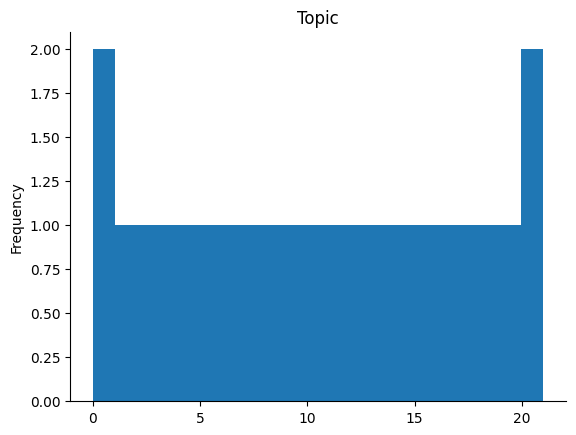

In [ ]:
from matplotlib import pyplot as plt
df['Topic'].plot(kind='hist', bins=20, title='Topic')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Hierarchical LDA**

In [ ]:
!pip install tomotopy
import json
from tomotopy import HLDAModel

file_name = '127.json'

with open(file_name, 'r', encoding='utf-8') as file:
    data = json.load(file)

documents = [item['content'].strip().split() for item in data]

mdl = HLDAModel(depth=3, min_cf=100)

for document in documents:
    mdl.add_doc(document)

print('Training model by iterating over the corpus 100 times, 10 iterations at a time')
iterations = 10
for i in range(0, 100, iterations):
    mdl.train(iterations)
    print('Iteration: #{}\tLog-likelihood: {}'.format(i, mdl.ll_per_word))

for k in range(mdl.k):
    if not mdl.is_live_topic(k):
        continue
    print('child of topic #{} - Level: {}, number of documents {}'.format(mdl.parent_topic(k), mdl.level(k), mdl.num_docs_of_topic(k)))
    print('Top 10 words of global topic #{}'.format(k))
    print(mdl.get_topic_words(k, top_n=10))


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 23.3 MB/s eta 0:00:00
Training model by iterating over the corpus 100 times, 10 iterations at a time
Iteration: #0	Log-likelihood: -4.400573738468156
Iteration: #10	Log-likelihood: -4.218599438939832
Iteration: #20	Log-likelihood: -4.122519308981232
Iteration: #30	Log-likelihood: -4.077412251032801
Iteration: #40	Log-likelihood: -4.04522174353458
Iteration: #50	Log-likelihood: -4.005745363291945
Iteration: #60	Log-likelihood: -4.029393636900828
Iteration: #70	Log-likelihood: -3.987600460530653
Iteration: #80	Log-likelihood: -3.984231047717962
Iteration: #90	Log-likelihood: -3.984852823433257
child of topic #-1 - Level: 0, number of documents 27
Top 10 words of global topic #0
[('the', 0.09447481483221054), ('and', 0.09043840318918228), ('to', 0.0822565034031868), ('a', 0.0492016077041626), ('says', 0.047347042709589005), ('He', 0.03436508774757385), ('that', 0.03218324854969978), ('he', 0.028583209961652756), ('of', 0.025855908

In [ ]:
parent_topics = [k for k in range(mdl.k) if mdl.children_topics(k).any() and mdl.num_docs_of_topic(k) > 100] # Use .any() to check if there are any child topics
for parent_topic in parent_topics:
    child_topics = [child_topic for child_topic in mdl.children_topics(parent_topic) if mdl.num_docs_of_topic(child_topic) > 100]
    if child_topics:
        print('\n\n')
    print('Top 10 words of level %s parent topic #%s of %s documents: %r' % (mdl.level(parent_topic), parent_topic, mdl.num_docs_of_topic(parent_topic), mdl.get_topic_words(parent_topic, top_n=10)))

    for child_topic in child_topics:
        print('    Top 10 words of child topic #%s: %r' % (child_topic, mdl.get_topic_words(child_topic, top_n=10)))

## **try to remove some stopwords**

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

preprocessed_documents = []
for text in open("127.json", 'r'):
    tokens = [word for word in text.strip().split() if word.lower() not in ENGLISH_STOP_WORDS and len(word) > 2]
    preprocessed_documents.append(' '.join(tokens))


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=10000)
X = vectorizer.fit_transform(preprocessed_documents)

In [ ]:
import tomotopy as tp
import json

# 合并所有停用词
stop_words = set([
    'the', 'to', 'a', 'and', 'is', 'of', 'in', 'that', 'his', 'with',
    'her', 'she', 'he', 'it', 'on', 'they', 'this', 'for', 'but', 'from',
    'by', 'as', 'at', 'if', 'not', 'or', 'their', 'be', 'out', 'about',
    'an', 'while', 'comes', 'starts', 'him', 'him.', 'Ashley', 'David', 'Cliff',
    'Lana', 'Rolo', 'Carrie', 'Jack', 'Rachel', 'Catherine', 'Nida', 'Pia', 'Victoria',
    'says', 'asks', 'has', 'tells', 'was', 'get', 'gets', 'her.', "doesn't", 'into', 'who',
    'what', "it's", 'have', 'can', 'Emily', 'Danny', 'Karl', 'Martha', 'Ash',
    'Jem', 'Bing', 'Mazey', 'Hector', 'Duke', 'Joe', 'Matt', 'Beth', 'Parke',
    'Baxter', 'Jamie', 'Waldo', 'Liam', 'Sara', 'Mia', 'Shazia', 'Rob', 'Amy',
    'Frank', 'Bella', 'Nish', 'Dawson', 'Clayton', 'Parker', 'Callow', 'Ffion',
    'Daly', 'Cole', 'Katie', 'Jessica', 'Henry', 'I', 'you', 'we', 'he', 'she',
    'it', 'they', 'me', 'him', 'her', 'us', 'them', 'my', 'your', 'our', 'his',
    'their', 'in', 'on', 'at', 'by', 'with', 'about', 'against', 'between',
    'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from',
    'up', 'down', 'off', 'over', 'under', 'have', 'has', 'had', 'do', 'does',
    'did', 'can', 'could', 'would', 'should', 'will', 'shall', 'might', 'must',
    'it.', 'them', 'are', 'like', 'one', 'where', 'then', 'just', 'because',
    'wants', 'watches', 'back', 'did', 'which', 'first', 'following', 'seen',
    'sees', 'when', 'When', 'how', 'see', 'take', 'she\'s', 'tries', 'all', 'more',
    'he\'s', 'looks', 'goes', 'been', 'put', 'find', 'didn\'t', 'they\'re', 'that\'s', 'herself',
    'Bing', 'without', 'three', 'day', 'using', 'several', 'every', 'look',
    'David\'s', 'he\'ll', 'want', 'know', 'hit', 'left', 'again', 'telling', 'makes', 'realizes',
    'trying', 'part', 'talking',  'took', 'Jamie', 'Waldo', 'coming', 'suggests', 'himself',
    'later', 'having', 'out', 'run', 'its', 'Jessica', 'what\'s',
    'Danny', 'Karl',  'asking', 'tried', 'day', 'sits', 'say', 'says', 'asks',
    'She\'s', 'Sandy', 'Mona', 'Mac', 'show', 'glass', 'until', 'only', 'live', 'called', 'few', 'used', 'Liam',
    'Ffion', 'footage', 'around', 'daughter', 'meets', 'already', 'eventually', 'explains', 'takes', 'help', 'behind', 'allows', 'plays', 'opens', 'allowing',
    'Nida', 'Gaap', 'Vicky', 'Len', 'Michael', 'Keith', 'Suzie', 'Chris', 'three', 'Joan', 'Salma', 'Krish', 'Eric',
    'She\'s', 'Sandy', 'Mona', 'Mac', 'show', 'watch', 'show.', 'Jack', 'Rachel', 'Catherine', 'Too', 'Munk', 'Kevin', 'music', 'new', 'still', 'play', 'Mia',
    'Shazia', 'Rob', 'picture', 'puts', 'promises', 'woman', 'case', 'grabs', 'phone', 'decides', 'try', 'reveals', 'new', 'Victoria', 'Baxter',
    'nearby', 'calls', 'Bear', 'Jamie', 'public', 'own', 'world', 'Liam', 'back.', 'Kelly', 'time', 'leaves.', 'party', 'real', 'her,', 'Stripe',
    'agrees', 'working', 'video', 'again.', 'Parke', 'becomes', 'Jem', 'another'
])

def preprocess_document(text):
    tokens = text.strip().split()
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words and len(word) > 2]
    return filtered_tokens

mdl = tp.HLDAModel(depth=3, min_cf=10)  # 尝试减少 min_cf

# 读取 JSON 文件
file_name = '127.json'
with open(file_name, 'r', encoding='utf-8') as f:
    documents = json.load(f)

# 预处理文档并添加到模型中
valid_docs = 0
for doc in documents:
    # Extract the text content from the dictionary
    text = doc.get('content', '')  # Use .get() to handle cases where 'content' key might be missing
    tokens = preprocess_document(text)
    if tokens:  # 确保文档不为空
        mdl.add_doc(tokens)
        valid_docs += 1

print(f"Number of valid documents added to the model: {valid_docs}")

# 检查是否有足够的有效文档
if valid_docs == 0:
    raise ValueError("No valid documents found after preprocessing. Please check your data and stop words list.")

# 训练模型
print('Training model by iterating over the corpus 100 times, 10 iterations at a time')
iterations = 10
for i in range(0, 100, iterations):
    mdl.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {mdl.ll_per_word}')

# 打印结果
for k in range(mdl.k):
    if not mdl.is_live_topic(k):
        continue
    print('child of topic #%s - Level: %r, number of documents: %d' % (mdl.parent_topic(k), mdl.level(k), mdl.num_docs_of_topic(k)))
    print('Top 10 words of global topic #{}'.format(k))
    print(mdl.get_topic_words(k, top_n=10))


Number of valid documents added to the model: 27
Training model by iterating over the corpus 100 times, 10 iterations at a time
Iteration: 0	Log-likelihood: -5.072935426882462
Iteration: 10	Log-likelihood: -4.997587676030771
Iteration: 20	Log-likelihood: -4.951080198141104
Iteration: 30	Log-likelihood: -4.933728700910794
Iteration: 40	Log-likelihood: -4.912142900038779
Iteration: 50	Log-likelihood: -4.927808069981782
Iteration: 60	Log-likelihood: -4.925583949831227
Iteration: 70	Log-likelihood: -4.918748183266371
Iteration: 80	Log-likelihood: -4.934041094942344
Iteration: 90	Log-likelihood: -4.919622822201043
child of topic #-1 - Level: 0, number of documents: 27
Top 10 words of global topic #0
[('knows', 0.013297428376972675), ('them.', 0.012165972962975502), ('people', 0.012165972962975502), ('there', 0.011600244790315628), ('make', 0.011600244790315628), ("can't", 0.011317380703985691), ('some', 0.011034517548978329), ('shows', 0.011034517548978329), ('thinks', 0.010751653462648392)

**Labelled LDA**

In [4]:
!pip install tomotopy
import tomotopy as tp
import json
from collections import Counter

file_name = '127.json'

# Load the data from the specified file
with open(file_name, 'r') as input_file:
    data = json.load(input_file)

# Collect unique labels from the dataset
unique_labels = set()
for index, row in enumerate(data):
    labels = set(row['labels'])
    unique_labels |= set(labels)

unique_label_count = len(unique_labels)
# Use 'latent_topics' instead of 'k'
mdl = tp.PLDAModel(latent_topics=unique_label_count, min_cf=10, rm_top=5)

# Add documents to the model
for index, row in enumerate(data):
    if index % 1000 == 0 and index > 0:
        print('Adding document #%s' % index)
    content = row['content']
    labels = row['labels']
    clean_document = [token for token in content.strip().split() if len(token) > 2]
    if clean_document:  # Ensure the document is not empty
        mdl.add_doc(clean_document, labels=labels)

print('Starting to train the model')
for i in range(0, 100, 10):
    mdl.train(10)
    print('Iteration: {}\tLog-likelihood: {}'.format(i, mdl.ll_per_word))

# Print top words for each topic
for k in range(mdl.latent_topics): # Use mdl.latent_topics instead of mdl.k
    if k in mdl.topic_label_dict:
        print('Top 10 words of global topic #{} {}: {}'.format(k, mdl.topic_label_dict[k], mdl.get_topic_words(k, top_n=10)))
    else:
        print('Top 10 words of global topic #{}: {}'.format(k, mdl.get_topic_words(k, top_n=10)))


Starting to train the model
Iteration: 0	Log-likelihood: -7.146896122883894
Iteration: 10	Log-likelihood: -6.945643655463149
Iteration: 20	Log-likelihood: -6.826255087509026
Iteration: 30	Log-likelihood: -6.783406975754646
Iteration: 40	Log-likelihood: -6.707356226538668
Iteration: 50	Log-likelihood: -6.624225898702611
Iteration: 60	Log-likelihood: -6.525449473460998
Iteration: 70	Log-likelihood: -6.4817331294128975
Iteration: 80	Log-likelihood: -6.451902512055702
Iteration: 90	Log-likelihood: -6.448468472507047
Top 10 words of global topic #0: [('coming', 0.0019646366126835346), ('last', 0.0019646366126835346), ('night', 0.0019646366126835346), ("don't", 0.0019646366126835346), ('under', 0.0019646366126835346), ('daughter', 0.0019646366126835346), ('nothing', 0.0019646366126835346), ('wife', 0.0019646366126835346), ('set', 0.0019646366126835346), ("wasn't", 0.0019646366126835346)]
Top 10 words of global topic #1: [('Matt', 0.586975634098053), ('room', 0.08829569071531296), ('dead', 0.

**LDA**

In [ ]:
!pip install little_mallet_wrapper

In [ ]:
import tomotopy as tp
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path
import pandas as pd

In [ ]:
import tomotopy as tp
import json

# 读取JSON文件
file_name = '127.json'
with open(file_name, 'r', encoding='utf-8') as file:
    data = json.load(file)

# 提取文档
training_data = [item['content'] for item in data] # Extract content from each item in the list

# 主题数量
num_topics = 226
# 每个主题的词语数量
num_topic_words = 15

# 初始化模型
model = tp.LDAModel(k=num_topics)

# 添加每个文档到模型中
for text in training_data:
    model.add_doc(text.strip().split()) # Indent this line to include it in the loop

print("Topic:")

Topic:
